In [61]:
# Homework 2 Part 1 (due 7/07/2024)
# Abby Irish

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test. 

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [63]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data
print(X)

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


R2 0.03530218264671636


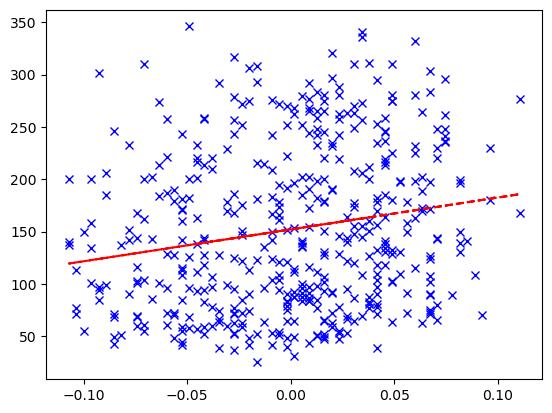

In [64]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# select first variable
var_name1 = var_names[0]

# select data associated with the first variable
x1 = X[var_name1]

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

# get residuals
resid = yHat-y

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yHat, ls='--', color='red')

age
t-stat:  4.012651743018034
R2:  0.03530218264671636
RSS:  2528481.7816048963
MSE:  5720.5470172056475
RSE:  75.80599912703144
f-stat:  1.5040147087310116
sex
t-stat:  0.9041147550244747
R2:  0.0018543357106460823
RSS:  2616148.8936170214
MSE:  5918.888899586022
RSE:  77.1089679611826
f-stat:  0.07635478511226447
bmi
t-stat:  15.187289570365301
R2:  0.3439237602253802
RSS:  1719581.8107738825
MSE:  3890.456585461273
RSE:  62.51512200285265
f-stat:  21.545158456155917
bp
t-stat:  10.320859017314628
R2:  0.1949061431435003
RSS:  2110158.3448469597
MSE:  4774.113902368687
RSE:  69.25181889385091
f-stat:  9.94994858670954
s1
t-stat:  4.5508864462124485
R2:  0.04495353245556555
RSS:  2503185.5056927945
MSE:  5663.315623739354
RSE:  75.42584416155793
f-stat:  1.9345552773721795
s2
t-stat:  3.7075705216746386
R2:  0.030294651136685613
RSS:  2541606.5673835794
MSE:  5750.241102677782
RSE:  76.0024905002159
f-stat:  1.284008759132137
s3
t-stat:  -9.01330453711378
R2:  0.15585855244530533
RSS

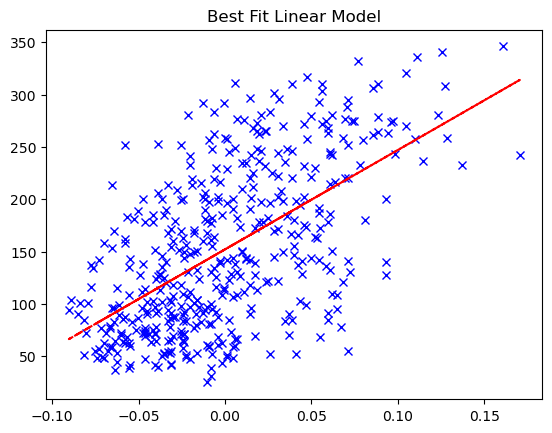

In [65]:
# STEP 2: Simple Linear Regression

# linear models for each independent variable:
from scipy import stats
var_names = X.columns

n = 422
k = 10

for i in range(len(var_names)):
    model2 = LinearRegression()
    
    var_name = var_names[i]
    print(var_name)
    
    x = X[var_name]
    
    x_data = np.array([x.to_numpy()]).T
    
    _ = model2.fit(x_data,y.to_numpy())
    
    yHat = model2.predict(x_data)
    
    resid = yHat - y

    yBar = np.mean(y)

# calculate t statistic 
    sse = np.sum(resid ** 2)
    s_var = sse / (len(y) - 2)
    se = np.sqrt(s_var / np.sum((x - np.mean(x)) ** 2))
    coef = model2.coef_[0]
    t_stat = coef / se
    print("t-stat: ", t_stat)
    
# calculate R^2: 
    R2 = model2.score(x_data,y)
    print('R2: ', R2)

# calculate RSS
    RSS = np.sum(resid ** 2)
    print ("RSS: ", RSS)
    
# calculate MSE 
    MSE = RSS/len(x_data)
    print("MSE: ", MSE)
    
# calculate RSE 
    RSE = np.sqrt(RSS / (len(resid)-2))
    print("RSE: ", RSE)

# calculate f-stat (for comparison in Step 4): 
    yBar = np.mean(y)
    TSS = sum((y - yBar) ** 2)
    ESS = TSS - RSS
    fstat = (ESS / k) / (RSS / (n - k - 1))
    print("f-stat: ", fstat)


# Plot for the model with the best fit: 
model3 = LinearRegression()

x2 = X[var_names[2]] # bmi is variable with best fit
print(var_names[2])

x2_data = np.array([x2.to_numpy()]).T

_ = model3.fit(x2_data,y.to_numpy())

yHat = model3.predict(x2_data)

resid = yHat - y

plt.subplot(111)

# plot data
plt.plot(x2, y, marker='x', lw=0, color='blue')
plt.title('Best Fit Linear Model')

# plot fit
plt.plot(x2, yHat, ls='--', color='red')

In [66]:
# STEP 3: Multivariate Linear Regression
all_variables = []

for i in var_names:
    col = X[i]
    col_all_variables = col.to_numpy().T
    all_variables.append(col_all_variables)

x_data = np.column_stack(all_variables)
print(x_data.shape)
print(x_data)

multivariateModel = LinearRegression()
_ = multivariateModel.fit(x_data, y.to_numpy())

yHat = multivariateModel.predict(x_data)
multiResid = yHat - y

# calculate RSS 
multiRSS = sum(multiResid ** 2)
print('RSS: ', multiRSS)

# calculate MSE:
multiMSE = mean_squared_error(yHat, y)
print('MSE: ', multiMSE)

# calculate RSE: 
multiRSE = np.sqrt(multiRSS / (len(multiResid) - 2))
print('RSE: ', multiRSE)

# calculate R^2:
multiR2 = multivariateModel.score(x_data, y)
print('R^2: ', multiR2)

# calculate an f-stat:
yBar = np.mean(y)
multiTSS = sum((y - yBar) ** 2)
multiESS = multiTSS - multiRSS
fstat = (multiESS / k) / (multiRSS / (n - k - 1))
print("f-stat: ", fstat)

(442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
RSS:  1263985.7856333428
MSE:  2859.6963475867506
RSE:  53.59752762346885
R^2:  0.5177484222203498
f-stat:  44.125226611450074


In [67]:
# Step 4: test the information content of each variable:

f_stats = []

for i in range(k): # interate over each variable to create reduced models
    x_data_reduced = np.delete(x_data, i, axis = 1) # remove the i-th variable

    reduced_model = LinearRegression()
    reduced_model.fit(x_data_reduced, y)
    yHat_reduced = reduced_model.predict(x_data_reduced)
    RSS_reduced = np.sum((y - yHat_reduced) ** 2)

    ESS = RSS_reduced - multiRSS
    f_stat = (ESS / 1) / (multiRSS / (n - k - 1))
    f_stats.append(f_stat)

for i, f_stat in enumerate(f_stats): # get both the variable index and the f-stat value 
    print(f"Variable {var_names[i]}: F-statistic = {f_stat}")

top_three_indices = np.argsort(f_stats)[-3:][::-1]

single_var_fits = []
for i in range(k):
    single_var_model = LinearRegression()
    single_var_model.fit(x_data[:, [i]], y)

    yHat_single = single_var_model.predict(x_data[:, [i]])
    RSS_single = np.sum((y - yHat_single) ** 2)
    single_var_fits.append(RSS_single)

top_three_single_indices = np.argsort(single_var_fits)[:3]
print("the top three variables with the best f-stats (in descending order) are: ")
for i in top_three_single_indices:
    print (f"{var_names[i]}")

Variable age: F-statistic = 0.026764321576521487
Variable sex: F-statistic = 14.631864316560707
Variable bmi: F-statistic = 58.21485398496115
Variable bp: F-statistic = 23.444317908887303
Variable s1: F-statistic = 3.4466920006097834
Variable s2: F-statistic = 1.8855950322058599
Variable s3: F-statistic = 0.21554248285932698
Variable s4: F-statistic = 1.14658561871518
Variable s5: F-statistic = 18.21416474918969
Variable s6: F-statistic = 1.0016588971552352
the top three variables with the best f-stats (in descending order) are: 
bmi
s5
bp


The top three variables with the best f-statistic from the reduced model are bmi, s5, and bp. The top three variables with the best f-statistic in the single-variable models are also bmi, s5, and bp, so compared to the rest of the variables, they do fit a linear model better. However, none of the variables have an R^2 value above 0.5 meaning that they do not fit linear models very strongly. When there are differences in variable rankings, this can be due to interaction effects in which the multivariate model captures interactions between variables but single-variable models don't. This could also be due to collinearity, where multivariate models can show high linear relationships between variables that are not as strong when it is just one of the variables alone.

In [68]:
# Step 5: Split a data set into a training set and test set and repeat steps 2 and 3

from sklearn.model_selection import train_test_split

# split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y)

# fit train model 
train_model = LinearRegression()
_ = train_model.fit(X_train, y_train.to_numpy())

yHat_train = train_model.predict(X_train) # get predictions

train_resid = y_train - yHat_train # get residuals

train_RSS = np.sum(train_resid ** 2) # calculate RSS

train_MSE = train_RSS / len(y_train) # calculate MSE

train_RSE = np.sqrt(train_RSS / (len(y_train) - X_train.shape[1] - 1)) # calculate RSE

train_R2 = train_model.score(X_train, y_train) # calculate R^2

train_fstat = (train_R2 / (1 - train_R2)) * ((len(y_train) - k - 1)/ k) # calculate f-stat:

# print values
print("train RSS: ", train_RSS)
print("train MSE ", train_MSE)
print("train RSE: ", train_RSE)
print("train R^2: ", train_R2)
print("train f-stat: ", train_fstat)


# use the model on the test set 
yHat_test = train_model.predict(X_test)

test_resid = y_test - yHat_test

test_RSS = np.sum(test_resid ** 2)

test_RSS = np.sum(test_resid ** 2)

test_MSE = test_RSS / len(y_test)

test_RSE = np.sqrt(test_RSS / (len(y_test) - X_test.shape[1] - 1))

test_R2 = train_model.score(X_test, y_test)

test_fstat = (test_R2 / (1 - test_R2)) * ((len(y_train) - k - 1)/ k)

print("test RSS: ", test_RSS)
print("test MSE ", test_MSE)
print("test RSE: ", test_RSE)
print("test R^2: ", test_R2)
print("test f-stat: ", test_fstat)

train RSS:  961465.6897755449
train MSE  2904.73018059077
train RSE:  54.81405185304748
train R^2:  0.520838031891331
train f-stat:  34.783263551381715
test RSS:  306775.1868289369
test MSE  2763.7404218823144
test RSE:  55.38728977201691
test R^2:  0.49736404701738834
test f-stat:  31.66436744151292


Usually, RSE is expected to increase when going from training to test data because the model is likely to fit the data it was trained on better. The R^2 is also expected to decrease for a similar reason. In this split set, however, we see that the RSE increased slightly, but that the R^2 decreased.